In [47]:
%matplotlib inline
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data_link = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data"
import requests
from cStringIO import StringIO
data = StringIO(requests.get(data_link).text)
df = pd.read_csv(data, sep="\t", index_col=0)

In [13]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [43]:
x = df[["lcavol", "lweight", "age", "lbph", "svi", "lcp", "gleason", "pgg45"]]
y = df["lpsa"]
w0 = np.ones(x.shape[1])
b0 = 100
def lp_constraint_sq(w, sign=+1):
    return sign*np.sum((y - np.dot(x, w))**2)

def lp_constraint(w, sign=+1):
    return sign*np.sum((y - np.dot(x, w)))

def lp_optFunc(*args):
    w, b = args
    return b

cons = ({'type': 'ineq', 'fun': lambda x: lp_constraint(x[0], sign=-1) + x[1]},
        {'type': 'ineq', 'fun': lambda x: lp_constraint(x[0], sign=+1) + x[1]})

In [44]:
from scipy.optimize import minimize
result = minimize(lp_constraint_sq, w0)

In [45]:
np.sqrt(np.sum((np.dot(x, result['x']) - y)**2))

6.5625961182130137

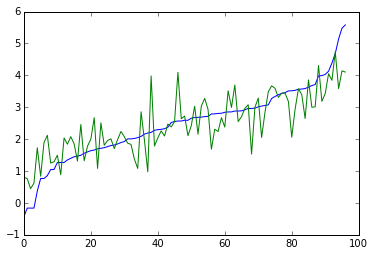

In [49]:
plt.plot(y)
plt.plot(np.dot(x, result['x']))

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

In [60]:
model.coef_

array([ 0.56434128,  0.62201979, -0.02124819,  0.09671252,  0.7616734 ,
       -0.10605094,  0.04922793,  0.00445751])

In [61]:
result['x']

array([ 0.56160644,  0.63634148, -0.02075169,  0.09389505,  0.76359398,
       -0.10662408,  0.06518437,  0.00417301])